In [1]:
!pip3 install googledrivedownloader
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_file_path = './data/btc_usdt_data.csv'

gdd.download_file_from_google_drive(file_id='1y22f1z5rww1urbgeZlTzRQBKWVBzvLt5',
                                    dest_path=data_file_path)

In [2]:
import pandas as pd

df = pd.read_json(data_file_path)

df

Open      High       Low     Close       Volume
2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83    47.181009
2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32    23.234916
2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35     7.229691
2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99     4.443249
2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69     0.972807
...                       ...       ...       ...       ...          ...
2020-10-28 16:00:00  13221.26  13221.50  13043.21  13142.02  5267.225157
2020-10-28 17:00:00  13142.02  13219.00  13000.01  13182.88  4071.954897
2020-10-28 18:00:00  13182.89  13240.00  13134.33  13209.86  2630.685999
2020-10-28 19:00:00  13209.87  13255.00  13145.38  13165.31  3068.601046
2020-10-28 20:00:00  13165.32  13202.90  13151.07  13196.20   434.659346

[27941 rows x 5 columns]

In [3]:
series = pd.Series(df['Close'].values, index=df.index)
series

2017-08-17 04:00:00     4308.83
2017-08-17 05:00:00     4315.32
2017-08-17 06:00:00     4324.35
2017-08-17 07:00:00     4349.99
2017-08-17 08:00:00     4360.69
                         ...   
2020-10-28 16:00:00    13142.02
2020-10-28 17:00:00    13182.88
2020-10-28 18:00:00    13209.86
2020-10-28 19:00:00    13165.31
2020-10-28 20:00:00    13196.20
Length: 27941, dtype: float64

In [82]:
data = pd.DataFrame(series.copy())

data.columns = ["y"]

data = data.resample('1D').mean()

data = data.dropna()

In [83]:
data

y
2017-08-17   4360.571500
2017-08-18   4233.007500
2017-08-19   4065.299583
2017-08-20   4124.093750
2017-08-21   4033.844167
...                  ...
2020-10-24  13015.298750
2020-10-25  13039.306667
2020-10-26  13054.535833
2020-10-27  13368.790833
2020-10-28  13459.646667

[1169 rows x 1 columns]

In [84]:
def _add_future_values(data, days=7):
    for i in range(0, days):
        data = data.append(pd.DataFrame(index=[data.index[len(data)-1]+pd.offsets.Day(1)]))

    return data

data = _add_future_values(data)
data = data.tail(sum(pd.isnull(data['y'])))

In [89]:
data.index = data.index.values.astype(np.int64) // 10 ** 9

In [90]:
data

y   someindex
1603929600 NaN  1603929600
1604016000 NaN  1604016000
1604102400 NaN  1604102400
1604188800 NaN  1604188800
1604275200 NaN  1604275200
1604361600 NaN  1604361600
1604448000 NaN  1604448000

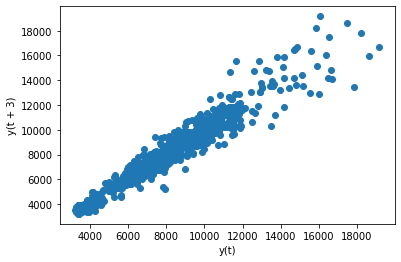

In [49]:
pd.plotting.lag_plot(data['y'], lag=3)

In [67]:
model = ARIMA(data, order=(4,1,0))
model_fit = model.fit()
output = model_fit.forecast(steps=7)
output

2020-10-29    17.194016
2020-10-30     7.880902
2020-10-31     9.930718
2020-11-01     8.868984
2020-11-02     8.020414
2020-11-03     7.800287
2020-11-04     7.790907
2020-11-05     7.786098
Freq: D, dtype: float64

In [51]:
from statsmodels.tsa.arima_model import ARIMA

train_data, test_data = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]
training_data = train_data['y'].values
test_data = test_data['y'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 45740.87991705019


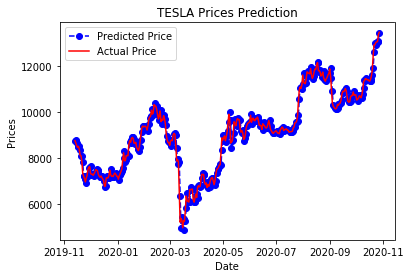

In [57]:
import matplotlib.pyplot as plt
import numpy as np

test_set_range = data[int(len(data)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [9]:
!pip3 install pmdarima

     |████████████████████████████████| 624kB 403kB/s 
     |████████████████████████████████| 2.0MB 8.3MB/s 
     |████████████████████████████████| 8.5MB 1.8MB/s 
     |████████████████████████████████| 235kB 7.2MB/s 
You should consider upgrading via the 'pip install --upgrade pip' command.


In [44]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(data['y'], start_p = 1, d=1, start_q = 1,
max_p = 10, max_q =10, max_d=10, m = 12,
start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
seasonal = True,
trace = True,
error_action ='ignore',
suppress_warnings = True,
stepwise = True, n_fits=50) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=17390.475, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=17460.301, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=17103.198, Time=1.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=17392.473, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=16976.628, Time=2.54 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=16869.906, Time=6.01 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=16835.081, Time=20.17 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=16804.379, Time=121.70 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=324.66 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=98.76 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=16865.171, Time=17.06 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=16804.951, Time=54.97 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=16804.999, Time=55.83 sec
 ARIMA(0,1,1)(

KeyboardInterrupt: 

In [34]:
print(arima_model.summary() ) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1351.815
Date:                Mon, 16 Nov 2020   AIC                           2715.629
Time:                        22:30:37   BIC                           2734.301
Sample:                             0   HQIC                          2723.208
                                - 167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1233      0.095    -11.797      0.000      -1.310      -0.937
ar.L2         -0.9077      0.090    -10.036      0.000      -1.085      -0.730
ma.L1          1.4048      0.117     12.049      0.0

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.

model = SARIMAX(data['y'], order = (1, 1, 2),seasonal_order =(5, 1, 0, 12))

result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1351.815
Date:                Mon, 16 Nov 2020   AIC                           2715.629
Time:                        22:30:46   BIC                           2734.301
Sample:                    08-17-2017   HQIC                          2723.208
                         - 10-22-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1233      0.095    -11.797      0.000      -1.310      -0.937
ar.L2         -0.9077      0.090    -10.036      0.000      -1.085      -0.730
ma.L1          1.4048      0.117     12.049      0.000       1.176       1.633
ma.L2          1.1519      0.156      7.394      0.000       0.847       1.457
ma.L3          0.2594      0.072      3.604      0.000       0.118       0.400
sigma2      6.925e+05   4.87e+04     14.206      0.000    5.97e+05    7.88e+05
===================================================================================
Ljung-Box (Q):                       21.56   Jarque-Bera (JB):               130.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:

forecast = result.predict(start = len(data), end = len(data)+7)

In [12]:
import math
from sklearn.metrics import mean_squared_error
testScore = math.sqrt(mean_squared_error(X_test, prediction))

NameError: name 'prediction' is not defined

In [41]:
forecast_df = forecast.to_frame()
forecast_df = forecast_df.rename(columns= {0: 'Prediction'})

0
2020-10-29  13522.674965
2020-11-05  13380.177454
2020-11-12  13518.917175
2020-11-19  13492.421990
2020-11-26  13396.247032
2020-12-03  13528.327775
2020-12-10  13467.264714
2020-12-17  13415.963345